In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('output69.csv')

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.3,4.4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.6
1,5.6,5.6,5.6,5.5,5.5,5.5,5.5,5.5,5.5,5.5,...,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.6
2,3.6,3.6,3.6,3.6,3.6,3.5,3.6,3.5,3.5,3.5,...,5.3,5.2,5.3,5.3,5.2,5.2,5.2,5.2,5.2,5.2
3,4.6,4.7,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,6.3,6.3,6.4,6.3,6.3,6.3,6.3,6.3,6.3,6.3
4,5.2,5.2,5.2,5.1,5.2,5.2,5.2,5.3,5.3,5.2,...,4.0,4.0,4.0,3.9,4.0,3.9,3.9,3.9,3.9,3.9


In [ ]:
missing_values_count = df.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 6203


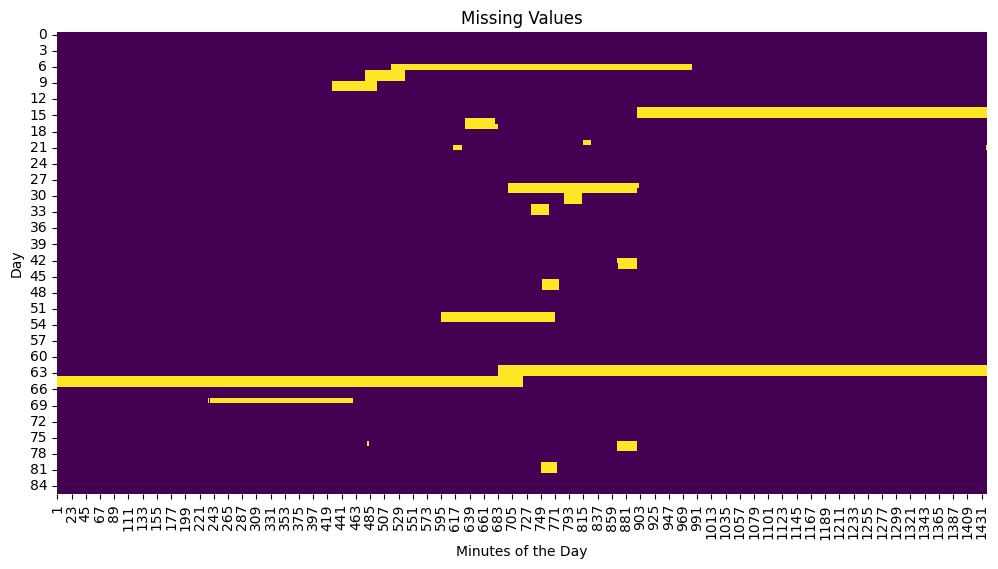

In [ ]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Minutes of the Day')
plt.ylabel('Day')
plt.show()

In [ ]:
df.replace('nan', np.nan, inplace=True)


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
missing_values_count = df_imputed.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


In [ ]:
df_imputed.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.3,4.4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.6
1,5.6,5.6,5.6,5.5,5.5,5.5,5.5,5.5,5.5,5.5,...,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.6
2,3.6,3.6,3.6,3.6,3.6,3.5,3.6,3.5,3.5,3.5,...,5.3,5.2,5.3,5.3,5.2,5.2,5.2,5.2,5.2,5.2
3,4.6,4.7,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,6.3,6.3,6.4,6.3,6.3,6.3,6.3,6.3,6.3,6.3
4,5.2,5.2,5.2,5.1,5.2,5.2,5.2,5.3,5.3,5.2,...,4.0,4.0,4.0,3.9,4.0,3.9,3.9,3.9,3.9,3.9


In [ ]:
df_imputed.to_csv('completed_temperature_data_KNN.csv', index=False)


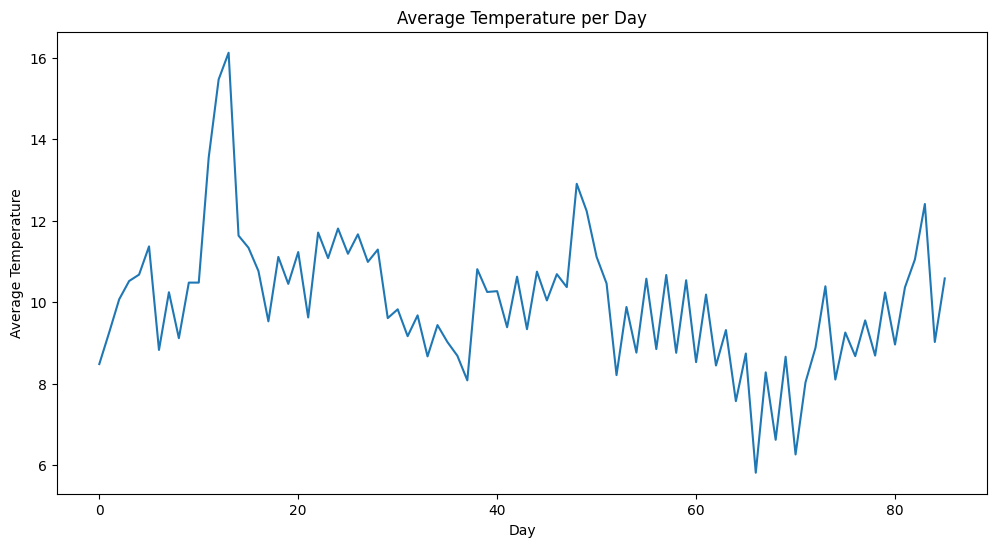

In [ ]:
plt.figure(figsize=(12, 6))
df_imputed.mean(axis=1).plot()
plt.title('Average Temperature per Day')
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.show()

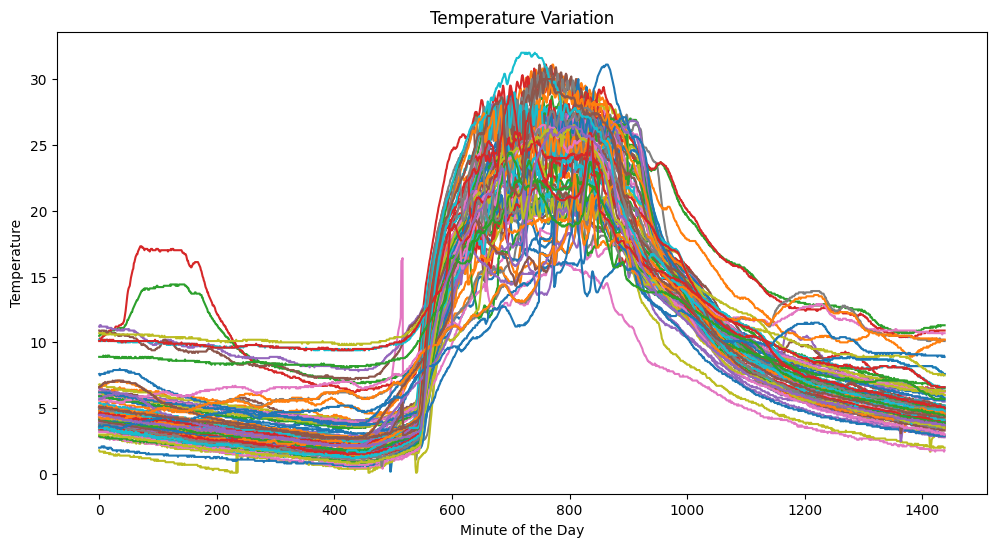

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_imputed.values.T)
plt.title('Temperature Variation')
plt.xlabel('Minute of the Day')
plt.ylabel('Temperature')
plt.show()